# Chapter 2. Epsilon Greedy Bandit Method
<br>
### __[Multi-armed Bandits](https://www.datahubbs.com/multi_armed_bandits_reinforcement_learning_1)__ 
<br>
***
#### 실수를 통해 얻은 레슨
1. 결과가 자연스럽게 수렴하지 않고 계속 흔들리는 현상 : **average_rewards 변수를 episode loop 내부에 넣는 실수**
1. 결과가 실행마다 epsilon 결과의 순서가 바뀌는 현상 : **dict 킷값 없이 list 에 결과를 담아서 결과가 셔플되어 플롯되는 실수**
1. reward 차트가 서서히 증가하지 않고 출력되는 현상 : **object 생성 및 episode 진행 시에 reset 하지않아 발생하는 오류**

In [1]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
# python self.n 과 같이 scalar 값의 increment 시에는 반드시 self.n 으로 써야 하고, reference 객체는 o = self.o 와 같이 받아 써도 된다.
key = "foo"
class Foo:
    def __init__(self):
        self.n = 0
        self.dic = {}
    def update(self):
        print("update")
        n = self.n
        dic = self.dic
        n += 1
        dic[key] = dic.get(key, 0) + n
    def updateSelf(self):
        print("udpateSelf")
        self.n += 1
        self.dic[key] = self.dic.get(key, 0) + self.n
    def print(self):
        n = self.n
        dic = self.dic
        print('current n is {}'.format(n))
        for k, v in dic.items():
            print(k, v)
        print()

foo = Foo()
foo.print()

foo.update()
foo.print()

foo.updateSelf()
foo.print()

In [20]:
#### Figure 2.2. Average performance of "-greedy action-value methods on the 10-armed testbed.
class EgreedyBanditMethod:

    def __init__(self, k = 10, eps=0):
        self.k = k               # num of arms
        self.eps = eps       # epsilon
        self.n = 0             # step count
        self.m_r = 0         # mean reward
        self.k_n = np.zeros(k) # step count for every k
        self.k_r = np.zeros(k) #  reward for every k
        self.k_mu = np.random.normal(0, 1, k) # mu of every k

    # eps 값에 따라서 0 ~ 10% 까지 not greedy action을 취한다.
    def getAction(self):
        prob = np.random.rand()
        action = 0
        if self.eps == 0 and self.n == 0:
            action = np.random.choice(self.k)
        elif prob < self.eps:
            action = np.random.choice(self.k)
        else:
            action = np.argmax(self.k_r)
        return action

    # 현재 action의 mu의 normal distribution unit variance 의 값을 reward로 반환한다
    def getReward(self, action):
        reward = np.random.normal(self.k_mu[action], 1)
        return reward

    # reward 값을 모델에 반영 - update 시에는 항상 self 로 접근하는 것이 안전함
    def updateModel(self, action, reward):
        self.n += 1
        self.k_n[action] += 1
        self.m_r += (reward - self.m_r) / self.n
        self.k_r[action] += (reward - self.k_r[action]) / self.k_n[action]
        return self.m_r
    
    def reset(self):
        self.n = 0             # step count
        self.m_r = 0         # mean reward
        self.k_n = np.zeros(self.k) # step count for every k
        self.k_r = np.zeros(self.k) #  reward for every k
        self.k_mu = np.random.normal(0, 1, self.k) # mu of every k
    
debug_flag = False

def debug(*args):
    if (debug_flag):
        print(list(args))

def plotChart(rewards, episodes):
    plt.figure(figsize=(12, 8))
    for eps, reward in rewards.items():
        omake = " (greedy)" if eps == "0" else ""
        plt.plot(reward, label="$\epsilon={}${}".format(eps, omake))
    plt.legend(bbox_to_anchor=(1.2, 0.5))
    plt.xlabel("Iterations")
    plt.ylabel("Average Reward")
    plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes) + " Episodes")
    plt.show()
    
def main(num_of_episodes = 1000, num_of_steps = 1000):
    ebms = {"0":EgreedyBanditMethod(eps=0), "0.1":EgreedyBanditMethod(eps=0.1), "0.01":EgreedyBanditMethod(eps=0.01)}
    rwds = {}
    for key, ebm in ebms.items():
        average_rewards = np.zeros(num_of_steps)
        for episode in range(num_of_episodes):
            ebm.reset()
            rewards = np.zeros(num_of_steps)
            for step in range(num_of_steps):
                action = ebm.getAction()
                reward = ebm.getReward(action)
                mean_reward = ebm.updateModel(action, reward)
                debug(action, reward, mean_reward)
                rewards[step] = mean_reward
            average_rewards = average_rewards + (rewards - average_rewards) / (episode + 1)
        rwds[key] = average_rewards.copy()
    plotChart(rwds, num_of_episodes)



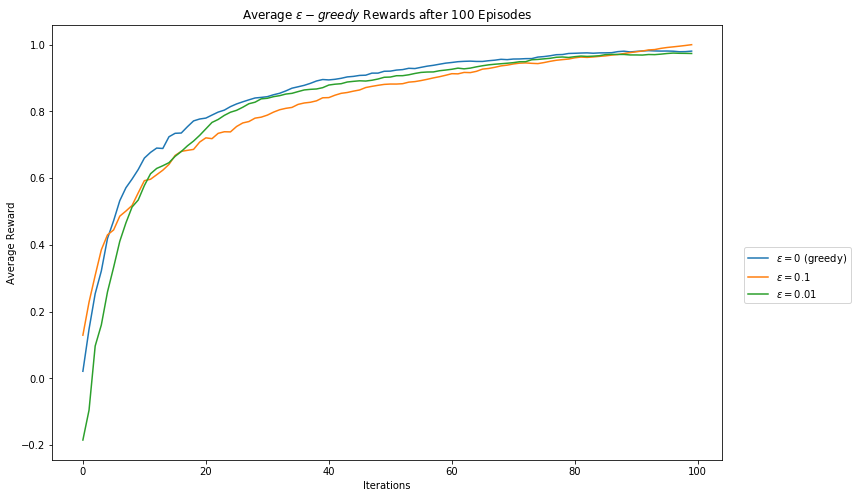

In [21]:
if __name__ == "__main__":
    main(100, 100)

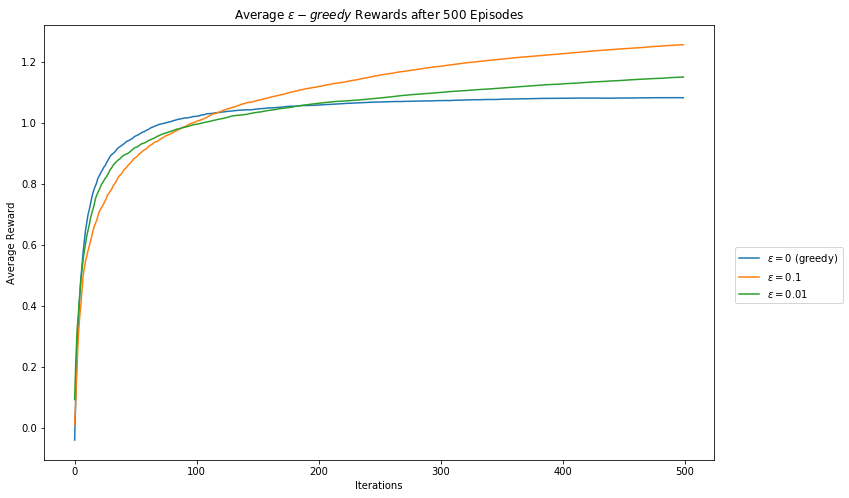

In [22]:
if __name__ == "__main__":
    main(500, 500)

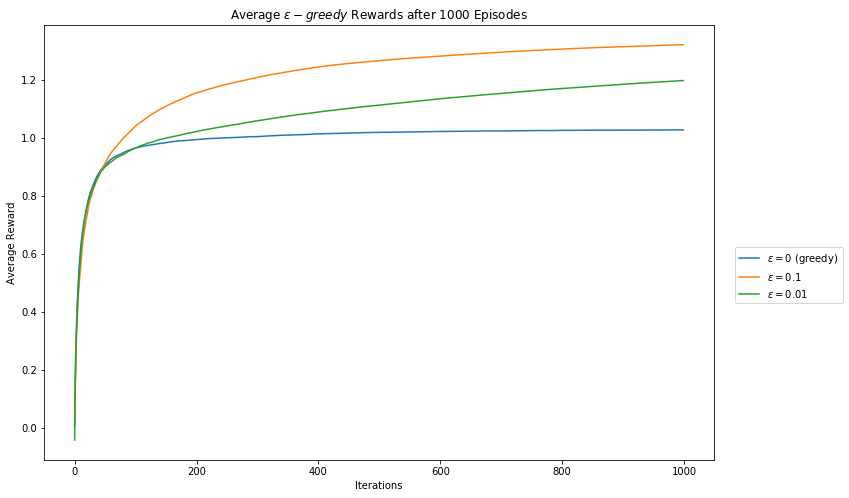

In [23]:
if __name__ == "__main__":
    main(1000, 1000)